<img src="https://gitlab.irit.fr/toc/ens-n7/texCoursN7/-/raw/main/LOGO_INP_N7.png" alt="N7" height="80"/>

<img src="https://gitlab.irit.fr/toc/ens-n7/texCoursN7/-/raw/main/logo-insa.png" alt="INSA" height="80"/>

# Calcul de dérivées

- Date : 2023-2024
- Durée approximative : 1h15

## Introduction

Il existe plusieurs façon de calculer une dérivée sur un calculateur : 

- par différences finies;
- par différentiation complexe;
- en utilisation la différentiation automatique;
- en utilisant le calcul formel et un générateur de code.

Nous allons étudier ici quelques cas que nous allons appliquer au calcul des équations variationnelles (ou linéarisées) des équations différentielles.

On notera $\|\cdot\|$ la norme euclidienne usuelle et $\mathcal{N}(0,1)$ une variable aléatoire Gaussienne centrée réduite.

In [1]:
# activate local project
using Pkg
Pkg.activate(".")

# load packages
using DualNumbers
using DifferentialEquations
using ForwardDiff
using LinearAlgebra
using Plots
using Printf

  Activating project at `~/Documents/ENSEEIHT/Cours SN (général)/n7-SN/2A ModIA/S7 (INSA)/Calcul différentiel et EDO/TPs`


   Resolving package versions...


  No Changes to `~/Documents/ENSEEIHT/Cours SN (général)/n7-SN/2A ModIA/S7 (INSA)/Calcul différentiel et EDO/TPs/Project.toml`
  No Changes to `~/Documents/ENSEEIHT/Cours SN (général)/n7-SN/2A ModIA/S7 (INSA)/Calcul différentiel et EDO/TPs/Manifest.toml`


## Dérivées par différences finies avant

Soit $f$ une fonction lisse de $\mathbb{R}^{n}$ dans $\mathbb{R}^{m}$, $x$ un point de $\mathbb{R}^{n}$ et $v$ un vecteur de $\mathbb{R}^{n}$. Si on note $g \colon h \mapsto f(x+hv)$, alors on a d'après la formule de Taylor-Young~:
$$
    g(h) = \sum_{i=0}^{n} \frac{h^i}{i!} g^{(i)}(0) + R_n(h), \quad R_n(h) = o(h^n),
$$
ou d'après Taylor-Lagrange, 
$$
    \| R_n(h) \| \leq \frac{M_n h^{n+1}}{(n+1)!},
$$
de même, 
$$
    g(-h) = \sum_{i=0}^{n} \frac{(-h)^i}{i!} g^{(i)}(0) + R_n(h).
$$

La méthode des différences finies avants consiste à approcher la différentielle de $f$ en $x$ dans la direction $v$ par la formule suivante : 
$$
    \frac{f(x+hv) - f(x)}{h} = 
    \frac{g(h)-g(0)}{h} = g'(0) + \frac{h}{2} g^{2}(0) + \frac{h^2}{6} g^{(3)}(0) + o(h^2).
$$
L'approximation ainsi obtenue de $ g'(0) =  f'(x) \cdot v \in \mathbb{R}^m$ est d'ordre 1 si $g^{(2)}(0) \neq 0$ ou au moins d'ordre 2 sinon. 

**Remarque.** Sur machine, Les calculs se font en virgule flottante. On note epsilon machine, le plus petit nombre $\mathrm{eps}_\mathrm{mach}$ tel que $1+\mathrm{eps}_\mathrm{mach}\ne 1$. Cette quantité dépend des machines et de l'encodage des données. Pour l'optenir en `Julia` il suffit de taper `eps()` (ou `eps(Float64)` pour les flottants codés sur 64 bits).

Notons $\mathrm{num}(g,\, h)$ la valeur de $g(h)$ calculée numériquement et supposons que l'on puisse majorer l'erreur relative numérique par : 
$$
  \left\| \mathrm{num}(g,h) - g(h) \right\| \coloneqq \| e_h\| \leq \mathrm{eps}_\mathrm{mach} L_f,
$$
ou $L_f$ est une constante qui dépend de la valeur de $f$ sur le domaine d'intérêt. Ainsi on a : 
\begin{align*}
    \left\| \frac{\mathrm{num}(g,h) - \mathrm{num}(g,0)}{h} - g'(0) \right\|
    &= \left\| \frac{g(h) + e_h - g(0) - e_0}{h} - g'(0) \right\|, \\[1em]
    &= \left\| \frac{R_1(h)}{h} + \frac{e_h - e_0}{h} \right\|, \\[1em]
    &\leq \left\| \frac{R_1(h)}{ h} \right\| + \left\| \frac{e_h - e_0}{h} \right\|, \\[1em]
    & \leq 
    \underbrace{ \frac{M_1 h}{2}}_{{\text{Erreur  d'approximation}}} +  
    \underbrace{2 \frac{\mathrm{eps}_\mathrm{mach}L_f}{h}}_{{\text{Erreur numérique}}}.
\end{align*} 
Le majorant trouvé atteint son minimum en 
$$
    h_{*} = 2 \sqrt{\frac{\mathrm{eps}_\mathrm{mach} L_f }{M_1}}.
$$

En considérant que $L_f \simeq M_1$, alors le choix se révélant le plus optimal est 
$$
    h_{*} \approx \sqrt{\mathrm{eps}_\mathrm{mach}}.
$$

## Dérivées par différences finies centrées

On peut utiliser un schéma de différences finies centrée pour calculer la dérviée de $g$. 
$$
    \frac{f(x+hv) - f(x-hv)}{2h} = \frac{g(h) - g(-h)}{2h} = 
    g'(0) + g^{(3)}(0) \frac{h^2}{6}  + \mathcal{O}(h^4),
$$
l'approximation ainsi obtenue de $f'(x) \cdot v \in \mathbb{R}^{m}$ est d'ordre 2 si $g^{(3)}(0) \neq 0$ ou au moins d'ordre 4 sinon. À noter que ce schéma nécessite plus d'évaluations de la fonction $f$. On peut montrer comme précédemment que le meilleur $h$  est de l'ordre 
$$
    h_* \approx \sqrt[3]{\mathrm{eps}_\mathrm{mach}}.
$$

## Dérivées par différentiation complexe

Les formules des schémas avant et centrée sont sensibles aux calculs de la différence $\Delta f = f(x+h) - f(x)$ ou $\Delta f = f(x+h) - f(x-h)$. Pour remédier à ce problème, les [différences finies à pas complexe](https://dl.acm.org/doi/10.1145/838250.838251) ont été introduites.
Si on suppose que la fonction $g$ est holomorphe,  c'est-à-dire dérivable au sens complexe,
on peut considérer un pas complexe $ih$. Un développement limité de $g$ en $0$ s'écrit

$$
    f(x+ih v) = g(ih) = g(0) + ih g'(0) - \frac{h^2}{2} g^{(2)}(0) - i\frac{h^3}{6} g^{(3)}(0) + o(h^3),
$$

On considère alors l'approximation : 

$$
    f'(x) \cdot v = g'(0)  \approx \frac{\mathrm{Im}(f(x+ihv))}{h}.
$$

On peut prouver que l'approximation ci-dessus est au moins d'ordre 2 et aussi démontrer que tout pas inférieur à $h_*$ est optimal, avec 
$$
    h_{*} \approx \sqrt{eps_{mach}}.
$$

$$(\text{c'est plutôt } h_{*} \approx 2\sqrt{eps_{mach}})$$

**Remarque.** Utiliser en `Julia` la commande `imag` pour calculer la partie imaginaire d'un nombre complexe et la variable `im` pour représenter l'unité imaginaire.

## Dérivées par différentiation automatique via les nombres duaux

Les nombres duaux s'écrivent sous la forme $a + b\, \varepsilon$ avec $(a,b)\in \mathbb{R}^2$ et $\varepsilon^2 = 0$. Nous allons voir comment nous pouvons les utiliser pour calculer des dérivées.

Soit deux fonctions $f, g \colon \mathbb{R} \to \mathbb{R}$ dérivables, de dérivées respectives $f'$ et $g'$. On pose

$$
f(a + b\, \varepsilon) \coloneqq f(a) + f'(a)\, b\, \varepsilon
$$

et

$$
g(a + b\, \varepsilon) \coloneqq g(a) + g'(a)\, b\, \varepsilon.
$$

On a alors automatiquement les propriétés suivantes. Posons $d = x + \varepsilon$, alors :

- $(f + g)(d) = (f+g)(x) + (f+g)'(x) \, \varepsilon$
- $(fg)(d) = (fg)(x) + (fg)'(x) \, \varepsilon$
- $(g \circ f)(d) = (g \circ f)(x) + (g \circ f)'(x) \, \varepsilon$

Voici comment créer un nombre dual en `Julia` et récupérer les parties réelles et duales (avec ce que j'ai défini ci-dessous) :

```julia
using DualNumbers

# scalar case
d = 1 + 2ε # ou 1 + 2 * ε ou 1 + ε * 2
real(d) # 1
dual(d) # 2

# vector case
d = [1, 3] + [2, 4]ε # ou [1, 3] + [2, 4] * ε ou [1, 3] + ε * [2, 4] ou [1+2ε, 3+4ε]
real(d) # [1, 3]
dual(d) # [2, 4]
```

**Remarque.** On peut aussi utiliser le package `ForwardDiff` pour calculer des dérivées automatiquement. Il est plus performant que `DualNumbers`.

## Fonctions auxiliaires

In [2]:
# available methods
methods = (:forward, :central, :complex, :dual, :forward_ad)

# type of x or its coordinates
function mytypeof(x::Union{T, Vector{<:T}}) where T<:AbstractFloat
    return T
end

# default step value
function _step(x, v, method)
    T = mytypeof(x)
    eps_value = T isa AbstractFloat ? eps(T) : eps(1.)
    if method == :forward
        step = √(eps_value)
    elseif method == :central
        step = (eps_value)^(1/3)
    elseif method == :complex
        step = √(eps_value)
    else
        step = 0.0
    end
    step *= √(max(1., norm(x))) / √(max(1.0, norm(v)))
    return step
end

# default method value
function _method()
    return :forward 
end;

# creation of dual number ε
import Base.*
*(e::Function, x::Union{Number, Vector{<:Number}}) = e(x)
*(x::Union{Number, Vector{<:Number}}, e::Function) = e(x)
ε(x=1) = begin 
    if x isa Number
        return Dual.(0.0, x)
    else
        return Dual.(zeros(length(x)), x)
    end
end
em = ε
dual(x::Union{Dual, Vector{<:Dual}}) = dualpart.(x)
real(x::Union{Dual, Vector{<:Dual}}) = realpart.(x);

## La méthode principale pour le calcul de dérivées

In [13]:
## COMPLETED

# compute directional derivative
function derivative(f, x, v; method=_method(), h=_step(x, v, method))
    if method ∉ methods 
        error("Choose a valid method in ", methods)
    end
    if method == :forward
        # 
        return (f(x + h*v) - f(x))/h # UPDATED
    elseif method == :central
        #
        return (f(x + h*v) - f(x - h*v))/(2*h) # UPDATED
    elseif method == :complex
        #
        return imag(f(x + im*h*v))/h # UPDATED
    elseif method == :dual 
        #
        return dual(f(x + ε*v)) # UPDATED
    elseif method == :forward_ad
        if x isa Number
            return ForwardDiff.derivative(f, x)*v
        else
            return ForwardDiff.jacobian(f, x)*v
        end
    end
end;

## Exercice 1

1. Compléter la fonction `derivative` ci-dessus avec les méthodes de différences finies avant, centrée, par différentiation complexe et par différentiation automatique via les nombres duaux.
2. Exécuter le code ci-dessous et vérifier les résultats obtenus.

In [14]:
# function to print derivative values and errors
function print_derivatives(f, x, v, sol)

    println("Hand derivative: ", sol, "\n")

    for method ∈ methods
        dfv = derivative(f, x, v, method=method)
        println("Method: ", method)
        println("   derivative: ", dfv)
        @printf("   error: %e\n", norm(dfv - sol))
        if method ∈ (:forward, :central, :complex)
            step = _step(x, v, method)
            println("   step: ", step)
            @printf("   error/step: %e\n", norm(dfv - sol) / step)
        end
        println()
    end

end;

In [15]:
# Scalar case

# check if the derivatives are correct
f(x) = cos(x)
x    = π/4
v    = 1.0

# solution
sol  = -sin(x)*v

# print derivatives and errors for each method
print_derivatives(f, x, v, sol)

Hand derivative: -0.7071067811865475

Method: forward
   derivative: -0.7071067914366722
   error: 1.025012e-08
   step: 1.4901161193847656e-8
   error/step: 6.878742e-01

Method: central
   derivative: -0.7071067811880243
   error: 1.476819e-12
   step: 6.055454452393343e-6
   error/step: 2.438824e-07

Method: complex
   derivative: -0.7071067811865475
   error: 0.000000e+00
   step: 1.4901161193847656e-8
   error/step: 0.000000e+00

Method: dual
   derivative: -0.7071067811865475
   error: 0.000000e+00

Method: forward_ad
   derivative: -0.7071067811865475
   error: 0.000000e+00



In [16]:
# Vectorial case

# check if the derivatives are correct
f(x) = [0.5*(x[1]^2 + x[2]^2); x[1]*x[2]]
x    = [1.0, 2.0]
v    = [1.0, -1.0]

# solution
sol  = [x[1]*v[1]+x[2]*v[2], x[1]*v[2]+x[2]*v[1]]

# print derivatives and errors for each method
print_derivatives(f, x, v, sol)

Hand derivative: 

[-1.0, 1.0]



Method: forward
   derivative: [-0.9999999878930315, 0.9999999878930315]
   error: 1.712184e-08
   step: 1.8737218226238124e-8
   error/step: 9.137877e-01

Method: central
   derivative: [-1.0000000000174705, 1.0000000000028897]
   error: 1.770784e-11
   step: 7.614330860361763e-6
   error/step: 2.325594e-06

Method: complex
   derivative: [-1.0, 1.0]
   error: 0.000000e+00
   step: 1.8737218226238124e-8
   error/step: 0.000000e+00

Method: dual
   derivative: [-1.0, 1.0]
   error: 0.000000e+00

Method: 

forward_ad
   derivative: [-1.0, 1.0]
   error: 0.000000e+00



## Pas optimal

On se propose de tester pour la fonction $\cos$ aux points $x_0=\pi/3$, $x_1 = 10^6\times\pi/3$ et la fonction $\cos+10^{-8} \mathcal{N}(0, \, 1)$ au point $x_0=\pi/3$ l'erreur entre les différences finies et la dérivée au point considéré en fonction de $h$. On prendra $h=10^{-i}$ pour $i= \{1,\ldots,16\}$ et on tracera ces erreurs dans une échelle logarithmique (en `Julia`, avec le package `Plots` on  utilise l'option `scale=:log10`).

## Exercice 2

- Visualiser les différentes erreurs en fonction de $h$ pour les différentes méthodes de calcul de dérivées. Commentaires.
- Modifier la précision de $x_0$ et $x_1$ en `Float32`. Commentaires.

In [17]:
# affichage des erreurs en fonction de h
function print_errors(steps, errors, h_star, title)

    non_nul_element = findall(!iszero, errors) 
    errors = errors[non_nul_element];
    steps  = steps[non_nul_element];

    # Courbe des erreurs pour les differents steps en bleu
    p1 = plot((10.).^(-steps), errors, xscale=:log10, yscale=:log10, linecolor=:blue, lw=2);

    # Ligne verticale pour situer l'erreur optimale h* en rouge
    plot!(p1,[h_star, h_star], [minimum(errors), maximum(errors)], linecolor=:red)
    plot!(p1, xlabel = "h", ylabel = "erreurs", title = title);

    #
    display(p1)

end;

In [18]:
# Les differentes fonctions et la dérivée theorique
fun1(x) = cos(x)
fun2(x) = cos(x) + 1.e-8*randn()
dfun(x) = -sin(x);

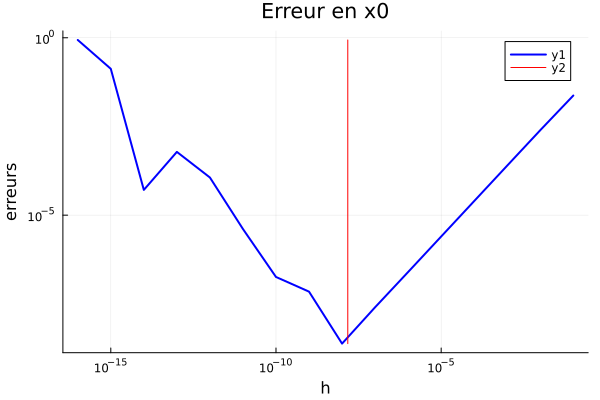

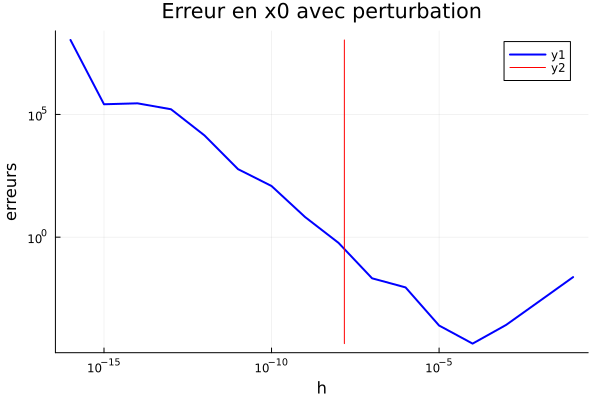

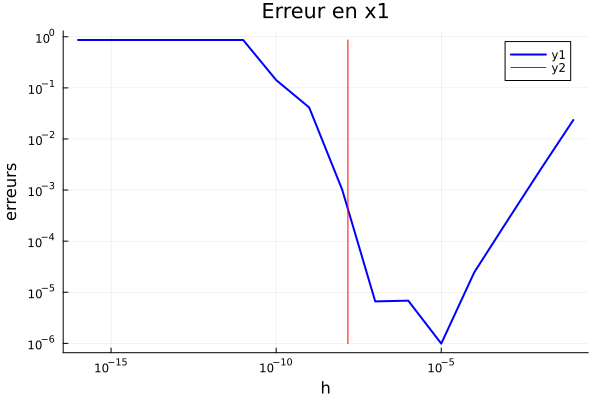

In [27]:
# method 
method = :forward     # TO PLAY WITH
#method = :central
#method = :complex
#
h_star = √(eps(1.0))  # TO UPDATE ACCORDING TO THE METHOD
#h_star = (eps(1.0))^(1/3) # pour la méthode centrale

# Points pour lesquels on souhaite effectuer les tests
x0 = π/3        # si on change en Float32(\pi/3), la précision devient en e-7 et l'odre de la perturbation est alors du même ordre, 
                # et on observe alors en forward que les figures 1 et 2 sont similaires
x1 = 1.e6*π/3   # (et on ajoute alors aussi Float32 ici)

# steps pour faire les tests
steps = range(1, 16, 16)

# Initialisation des vecteurs d'erreur
err_x0  = zeros(length(steps))
err_x0p = zeros(length(steps))
err_x1  = zeros(length(steps))

# Calcul des erreurs
for i in 1:length(steps)
    h = 10^(-steps[i])
    err_x0[i]  = abs(derivative(fun1, x0, 1.0, h=h, method=method) - (dfun(x0)))
    err_x1[i]  = abs(derivative(fun1, x1, 1.0, h=h, method=method) - (dfun(x1)))
    err_x0p[i] = abs(derivative(fun2, x0, 1.0, h=h, method=method) - (dfun(x0)))
end

# Affichage des erreurs
print_errors(steps, err_x0,  h_star, "Erreur en x0")
print_errors(steps, err_x0p, h_star, "Erreur en x0 avec perturbation")
print_errors(steps, err_x1,  h_star, "Erreur en x1")
